In [3]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt
import random

def get_data(x0):
    r = 3.8
    x = []
    x.append(x0)
    for i in range(1,1100):
        x1=x0*r*(1-x0)
        x0=x1
        x.append(x1)
    x=np.asarray(x)
    return(x)

menor = np.loadtxt("esn_big_minstable_r3.8_x0.1_d1000.csv", delimiter=",")
list_of_x0 = np.loadtxt("esn_random_x0.1_r3.8.csv", delimiter=" ")

menor1 = menor[:3944]
menor2 = menor[4237:]

list1 = list_of_x0[:3944]
list2 = list_of_x0[4237:]

print(list1.shape,list2.shape)

menor=np.vstack((menor1,menor2))
list_of_x0=np.hstack((list1,list2))


In [4]:


def turnintoarray(erro_list,d):
    erro_array = np.asarray(erro_list).reshape(int(len(erro_list)),d)
    return erro_array

    
def geterrors(FUTUREerror):
    
    a = abs(FUTUREerror)
    b = FUTUREerror**2
    
    mae = []
    mse = []
    rmse = []
    
    for i in range(FUTUREerror.shape[1]):
        mae.append(np.sum(a,axis=0)[i]/FUTUREerror.shape[0])
        mse.append(np.sum(b,axis=0)[i]/FUTUREerror.shape[0])
        rmse.append(np.sqrt(np.sum(b,axis=0)[i]/FUTUREerror.shape[0]))
        
   
    
    return mae,mse,rmse

In [5]:


future_error = []




for i in range(menor.shape[0]):
    data = get_data(list_of_x0[i])
    
    future_t = np.zeros((10))
    esn = ESN(n_inputs = 1,
        n_outputs = 1,
      n_reservoir = int(menor[i][1]),
      spectral_radius = menor[i][2],
      random_state=42)
    trainlen = 1000
    future = 100
    pred_training = esn.fit(np.ones(trainlen),data[0:trainlen])

    prediction = esn.predict(np.ones(future))
    error = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    print(i,'test error:',error)
   
    future_error.append(prediction.flatten()-data[trainlen:trainlen+future])
   

    
    
    

0 test error: 0.321708771107076
1 test error: 0.3413553063623453
2 test error: 0.2751148996618824
3 test error: 0.304021127388745
4 test error: 0.35110765115803894
5 test error: 0.33710184587952824
6 test error: 0.3171877850132907
7 test error: 0.30343659801485107
8 test error: 0.3119486031051984
9 test error: 0.2781827733277578
10 test error: 0.2943608864268565
11 test error: 0.2897918770240206
12 test error: 0.30710872907714204
13 test error: 0.28658247076736715
14 test error: 0.29819244607933426
15 test error: 0.3420000328994481
16 test error: 0.31919823026991423
17 test error: 0.31559479455342815
18 test error: 0.29557616925550706
19 test error: 0.33537408612441344
20 test error: 0.3089971846694187
21 test error: 0.30329248012164056
22 test error: 0.3548529111955199
23 test error: 0.36845221772929626
24 test error: 0.3371829914764411
25 test error: 0.2909248409858273
26 test error: 0.2846171280164723
27 test error: 0.35042258687557903
28 test error: 0.3549517699952516
29 test error

236 test error: 0.30499327806047843
237 test error: 0.3260463066961108
238 test error: 0.34248876381899424
239 test error: 0.34697497758433454
240 test error: 0.3267307435541475
241 test error: 0.3549851157021897
242 test error: 0.2869694179820754
243 test error: 0.31427327624607154
244 test error: 0.30436281126588294
245 test error: 0.2649903596430078
246 test error: 0.3448822320612845
247 test error: 0.3198372476049916
248 test error: 0.30676175705334885
249 test error: 0.3019692387479042
250 test error: 0.3195538372473196
251 test error: 0.3035957510087727
252 test error: 0.3023960512639597
253 test error: 0.32138411179755316
254 test error: 0.32680703203792977
255 test error: 0.32817705351802384
256 test error: 0.33635962488246257
257 test error: 0.34039312302615793
258 test error: 0.31521134773650283
259 test error: 0.2982289943934592
260 test error: 0.2846048335034926
261 test error: 0.30245011973590824
262 test error: 0.2969233048944987
263 test error: 0.33505584171511105
264 te

468 test error: 0.31759741829861315
469 test error: 0.2868904597073959
470 test error: 0.3241157006283397
471 test error: 0.3201595789170461
472 test error: 0.2950286982805689
473 test error: 0.32081417488208414
474 test error: 0.32174351804253465
475 test error: 0.3067414025670221
476 test error: 0.3121719534436936
477 test error: 0.29978647282233045
478 test error: 0.33987871271136977
479 test error: 0.32132902728824747
480 test error: 0.34324125598254024
481 test error: 0.30243915501497703
482 test error: 0.3063226517428161
483 test error: 0.3345926986586708
484 test error: 0.2945394959157162
485 test error: 0.3154565661915059
486 test error: 0.2993400144608545
487 test error: 0.30500852585799587
488 test error: 0.3115882497767421
489 test error: 0.3048451199339021
490 test error: 0.3025594436355319
491 test error: 0.301005261085426
492 test error: 0.28470647443097613
493 test error: 0.31352789503064643
494 test error: 0.2949242877245093
495 test error: 0.26101114835819617
496 test 

700 test error: 0.316432020628934
701 test error: 0.23355769032051865
702 test error: 0.27261172330520506
703 test error: 0.3125747234330997
704 test error: 0.3570739962966901
705 test error: 0.2715221914913663
706 test error: 0.31084875708118076
707 test error: 0.3523445219003208
708 test error: 0.3161694166669958
709 test error: 0.3415502480424009
710 test error: 0.3348023847831333
711 test error: 0.35780823871742895
712 test error: 0.31609502692344515
713 test error: 0.30246434416940876
714 test error: 0.3393737815274109
715 test error: 0.3042683592989092
716 test error: 0.3417129593591258
717 test error: 0.3473960036101442
718 test error: 0.32874450891564316
719 test error: 0.30733896792937776
720 test error: 0.2645394517995139
721 test error: 0.30849291399486956
722 test error: 0.3221578420072742
723 test error: 0.2839049302003961
724 test error: 0.335514773508489
725 test error: 0.32217506906399496
726 test error: 0.30813919682600266
727 test error: 0.33308983726694125
728 test e

933 test error: 0.30080794193859683
934 test error: 0.28295206276583945
935 test error: 0.350706484723109
936 test error: 0.32621209122788447
937 test error: 0.3076570927790171
938 test error: 0.2903409119715622
939 test error: 0.30967735528497703
940 test error: 0.3226112632650773
941 test error: 0.26470255383674574
942 test error: 0.33949901089405266
943 test error: 0.3289403279270684
944 test error: 0.3548625487524058
945 test error: 0.3243210905564027
946 test error: 0.30928251331761086
947 test error: 0.3294399150503521
948 test error: 0.33226095236786224
949 test error: 0.33303420493598507
950 test error: 0.33295246760780306
951 test error: 0.3005124898102347
952 test error: 0.3038674760732742
953 test error: 0.3012995686555437
954 test error: 0.32386249917298177
955 test error: 0.31364531875741936
956 test error: 0.2889179006409393
957 test error: 0.2886196206358065
958 test error: 0.3578198140796731
959 test error: 0.3237779925683355
960 test error: 0.30769972618762054
961 test

1160 test error: 0.3322983470944326
1161 test error: 0.29989767492357927
1162 test error: 0.3337317793129089
1163 test error: 0.33836284810092176
1164 test error: 0.2924986874463711
1165 test error: 0.3317214627226805
1166 test error: 0.3452214648107316
1167 test error: 0.3159145363410698
1168 test error: 0.3310094847891441
1169 test error: 0.29650258267433577
1170 test error: 0.3343441167518123
1171 test error: 0.33155766958095456
1172 test error: 0.30123233929145593
1173 test error: 0.30920839854441257
1174 test error: 0.35231208115445606
1175 test error: 0.3410071184423787
1176 test error: 0.30817660485965076
1177 test error: 0.30667735506882526
1178 test error: 0.32992146313508863
1179 test error: 0.3475422847024041
1180 test error: 0.3053489150115612
1181 test error: 0.28809237909769564
1182 test error: 0.3258471783083001
1183 test error: 0.30314737560533056
1184 test error: 0.3302724313811657
1185 test error: 0.3093004684643066
1186 test error: 0.32781741499641964
1187 test error

1385 test error: 0.30103838497013613
1386 test error: 0.326572639169687
1387 test error: 0.32497120729440043
1388 test error: 0.3103831279060861
1389 test error: 0.31217414707460084
1390 test error: 0.3800948768005032
1391 test error: 0.31949642805956785
1392 test error: 0.3135785518926272
1393 test error: 0.29631201649383443
1394 test error: 0.33270776096530424
1395 test error: 0.33672515886356946
1396 test error: 0.32690531939603834
1397 test error: 0.29857414380096514
1398 test error: 0.2947775526339438
1399 test error: 0.348127010481737
1400 test error: 0.29032604134376166
1401 test error: 0.301194537678885
1402 test error: 0.29658820701037175
1403 test error: 0.3297313304555164
1404 test error: 0.3241522894564667
1405 test error: 0.3218587774786387
1406 test error: 0.2986949874208583
1407 test error: 0.28498181059081196
1408 test error: 0.3348558088808902
1409 test error: 0.33498224324542186
1410 test error: 0.35097154747939
1411 test error: 0.31253800495033174
1412 test error: 0.

1612 test error: 0.32448532078670145
1613 test error: 0.3389605784956992
1614 test error: 0.3033187360741259
1615 test error: 0.2923114026609249
1616 test error: 0.27258122980310673
1617 test error: 0.3158552364732972
1618 test error: 0.32111025810642846
1619 test error: 0.2871393398144439
1620 test error: 0.2963756110340475
1621 test error: 0.32271909299111434
1622 test error: 0.3306552004775123
1623 test error: 0.30037511353356483
1624 test error: 0.31578429716141604
1625 test error: 0.31678761954967044
1626 test error: 0.34126413306939835
1627 test error: 0.34827731608404194
1628 test error: 0.3294972657531506
1629 test error: 0.32223968195512515
1630 test error: 0.33373926743916416
1631 test error: 0.29267601460478326
1632 test error: 0.33040216973631575
1633 test error: 0.3038085819882923
1634 test error: 0.3170215861341593
1635 test error: 0.29497600188899453
1636 test error: 0.2868976629622785
1637 test error: 0.32325760774767887
1638 test error: 0.3154946067389014
1639 test err

1840 test error: 0.34083468772293396
1841 test error: 0.3129292226238371
1842 test error: 0.3206517708020734
1843 test error: 0.30468568456372924
1844 test error: 0.32996020524348524
1845 test error: 0.29953023826087977
1846 test error: 0.3545335732081721
1847 test error: 0.28859518955222535
1848 test error: 0.29651559733884125
1849 test error: 0.32877511549650523
1850 test error: 0.2748182745962994
1851 test error: 0.3467155464839909
1852 test error: 0.3128670412603121
1853 test error: 0.3209473262759722
1854 test error: 0.32851180708538713
1855 test error: 0.28117475248666973
1856 test error: 0.32424121482909646
1857 test error: 0.316626889940976
1858 test error: 0.2935526813709244
1859 test error: 0.3379050210042567
1860 test error: 0.2831240198548118
1861 test error: 0.2606990231044991
1862 test error: 0.34989536710136854
1863 test error: 0.3349559310230349
1864 test error: 0.3200187288748712
1865 test error: 0.2690918207593659
1866 test error: 0.2830789829602703
1867 test error: 0

2066 test error: 0.3457693460151149
2067 test error: 0.2975501248176481
2068 test error: 0.32476730504288565
2069 test error: 0.3098157817942791
2070 test error: 0.3170364564404718
2071 test error: 0.3440145657286346
2072 test error: 0.35171939759983395
2073 test error: 0.3071161053273068
2074 test error: 0.30188226447268507
2075 test error: 0.3205991514873494
2076 test error: 0.2842426573266137
2077 test error: 0.3225013772149588
2078 test error: 0.2967117603581098
2079 test error: 0.32335183676319196
2080 test error: 0.3054017444827191
2081 test error: 0.2998341214539038
2082 test error: 0.31439083922879324
2083 test error: 0.25744471974605126
2084 test error: 0.3073758852124397
2085 test error: 0.30323524123231443
2086 test error: 0.3301282071858185
2087 test error: 0.32210190036836406
2088 test error: 0.28569077862990844
2089 test error: 0.3532660854368854
2090 test error: 0.3070550536149605
2091 test error: 0.3042208852968174
2092 test error: 0.3027295051968897
2093 test error: 0.

2293 test error: 0.2662691701606823
2294 test error: 0.33232544433658745
2295 test error: 0.36966513406544754
2296 test error: 0.35514396026009004
2297 test error: 0.3252006233145496
2298 test error: 0.32515875380797704
2299 test error: 0.32125850296085723
2300 test error: 0.3157699873659148
2301 test error: 0.3256871365466209
2302 test error: 0.32225033846224865
2303 test error: 0.31129207912007467
2304 test error: 0.2804047808153001
2305 test error: 0.27332448946386256
2306 test error: 0.286734695826996
2307 test error: 0.3252855977284836
2308 test error: 0.3098420728540964
2309 test error: 0.31311369357824725
2310 test error: 0.2926355194909114
2311 test error: 0.34144768298850525
2312 test error: 0.3155887815474721
2313 test error: 0.29306942401548025
2314 test error: 0.28909517759404024
2315 test error: 0.28750178401939647
2316 test error: 0.3198451619075889
2317 test error: 0.3222467274843606
2318 test error: 0.3072541181119002
2319 test error: 0.316824917226968
2320 test error: 

2519 test error: 0.30886475004185043
2520 test error: 0.3258716590020903
2521 test error: 0.2874263587447922
2522 test error: 0.3164394110108115
2523 test error: 0.330919621983643
2524 test error: 0.347792334963687
2525 test error: 0.32303393858278656
2526 test error: 0.3244359323651847
2527 test error: 0.31424850081144706
2528 test error: 0.2970908090661877
2529 test error: 0.31784840196987846
2530 test error: 0.3040976311368348
2531 test error: 0.2982220167521855
2532 test error: 0.3141336898868741
2533 test error: 0.3040980550444222
2534 test error: 0.30104770423426097
2535 test error: 0.31051587128160946
2536 test error: 0.3486791728448969
2537 test error: 0.28872039788575443
2538 test error: 0.28359762755651213
2539 test error: 0.3054650905675756
2540 test error: 0.32001772923695615
2541 test error: 0.33266369131642426
2542 test error: 0.28136013453166236
2543 test error: 0.28902309181455094
2544 test error: 0.3021031006009502
2545 test error: 0.319839965252761
2546 test error: 0.

2747 test error: 0.2557143063226342
2748 test error: 0.3216732844094789
2749 test error: 0.310337900262048
2750 test error: 0.28338315695824007
2751 test error: 0.3267117301576239
2752 test error: 0.2829644715623611
2753 test error: 0.3016224561189583
2754 test error: 0.3287814424079686
2755 test error: 0.3184420915597619
2756 test error: 0.30996442378994393
2757 test error: 0.3049042612859888
2758 test error: 0.340359683106262
2759 test error: 0.2872952828610671
2760 test error: 0.34046554896052417
2761 test error: 0.3431586163967783
2762 test error: 0.3064796329481264
2763 test error: 0.34296697488500577
2764 test error: 0.3280107089990157
2765 test error: 0.3134330160551223
2766 test error: 0.3139548100302883
2767 test error: 0.2994689780780875
2768 test error: 0.3026275055057947
2769 test error: 0.3311418328993153
2770 test error: 0.29749921926698397
2771 test error: 0.34636522068450576
2772 test error: 0.26111690973332524
2773 test error: 0.3147754040092819
2774 test error: 0.3034

2973 test error: 0.31532869777163636
2974 test error: 0.32852581560652416
2975 test error: 0.3155296228762838
2976 test error: 0.33786788812490565
2977 test error: 0.32346295174895906
2978 test error: 0.3463971435894305
2979 test error: 0.2809987913305004
2980 test error: 0.33150100368923774
2981 test error: 0.3338481688948372
2982 test error: 0.30113504511831074
2983 test error: 0.31722990169932236
2984 test error: 0.29803176391047403
2985 test error: 0.3099555346494995
2986 test error: 0.29130254445274517
2987 test error: 0.28613387438136945
2988 test error: 0.3622266798588819
2989 test error: 0.3325994198831758
2990 test error: 0.3488343502986456
2991 test error: 0.3267875286967955
2992 test error: 0.3133872672481403
2993 test error: 0.27813546229231484
2994 test error: 0.30184509560888273
2995 test error: 0.27963889590313634
2996 test error: 0.28125565686529463
2997 test error: 0.26682687513400505
2998 test error: 0.3318180832532448
2999 test error: 0.28157028316486243
3000 test er

3202 test error: 0.2938047518163031
3203 test error: 0.2744698319156438
3204 test error: 0.29179387067437834
3205 test error: 0.32994190059626183
3206 test error: 0.30369199232421795
3207 test error: 0.307660874804452
3208 test error: 0.35215145171243584
3209 test error: 0.33508241203333294
3210 test error: 0.3258750799270418
3211 test error: 0.3597588137857292
3212 test error: 0.31998367628028024
3213 test error: 0.3011834692877966
3214 test error: 0.31607004600755984
3215 test error: 0.29324480632864697
3216 test error: 0.26131236414478215
3217 test error: 0.3519501778611885
3218 test error: 0.2946829002267062
3219 test error: 0.2996357179099498
3220 test error: 0.3493202873010709
3221 test error: 0.301991685441415
3222 test error: 0.3223437434154914
3223 test error: 0.33200372855164295
3224 test error: 0.2824993839205196
3225 test error: 0.3460392682511351
3226 test error: 0.3445959439961606
3227 test error: 0.3261100023158761
3228 test error: 0.34159829341171044
3229 test error: 0.

3428 test error: 0.30084495791652327
3429 test error: 0.2910612419896218
3430 test error: 0.2948509816922574
3431 test error: 0.2833563469672571
3432 test error: 0.2841386107517404
3433 test error: 0.30663614459350796
3434 test error: 0.3271198454937559
3435 test error: 0.3189203380735934
3436 test error: 0.35260669212329754
3437 test error: 0.2570904281690016
3438 test error: 0.2748300773914496
3439 test error: 0.3538965155811043
3440 test error: 0.2780953622912232
3441 test error: 0.325024680613341
3442 test error: 0.3062937758861293
3443 test error: 0.3209017931150266
3444 test error: 0.29648467976123843
3445 test error: 0.2967958736382307
3446 test error: 0.30048612153019116
3447 test error: 0.3067549798794056
3448 test error: 0.32648825926286634
3449 test error: 0.3747538724873532
3450 test error: 0.30664207717382164
3451 test error: 0.32518707253915535
3452 test error: 0.306510584627315
3453 test error: 0.2963556204798097
3454 test error: 0.30769386908549173
3455 test error: 0.36

3654 test error: 0.26943590341122886
3655 test error: 0.26505369089044134
3656 test error: 0.29438319851516703
3657 test error: 0.3209511318620838
3658 test error: 0.30061406739573865
3659 test error: 0.3185714539415521
3660 test error: 0.33410353745889704
3661 test error: 0.34881392697296126
3662 test error: 0.2877238749365239
3663 test error: 0.2856833870941413
3664 test error: 0.28858981766986347
3665 test error: 0.3284183054749714
3666 test error: 0.28720492784924656
3667 test error: 0.32439059507133916
3668 test error: 0.34778192854858087
3669 test error: 0.30872556127352346
3670 test error: 0.35473139518657965
3671 test error: 0.3316319819175048
3672 test error: 0.36772408852492083
3673 test error: 0.3208683403735284
3674 test error: 0.29103366327663266
3675 test error: 0.3517596886996386
3676 test error: 0.3096673281841982
3677 test error: 0.31416312944299646
3678 test error: 0.344160381623956
3679 test error: 0.3178742560421291
3680 test error: 0.27099956089660854
3681 test err

3879 test error: 0.32856252165374855
3880 test error: 0.29663315931740597
3881 test error: 0.32618113964096085
3882 test error: 0.3667197754733854
3883 test error: 0.3113306243627834
3884 test error: 0.28067176737855626
3885 test error: 0.3263386464256369
3886 test error: 0.25089349275960043
3887 test error: 0.326193806927648
3888 test error: 0.32659482444787746
3889 test error: 0.3194943537358626
3890 test error: 0.27499320389305554
3891 test error: 0.28359741835181373
3892 test error: 0.30659710813748564
3893 test error: 0.35162909500766926
3894 test error: 0.3386677269646273
3895 test error: 0.30130710552585416
3896 test error: 0.28560588808875714
3897 test error: 0.3270248606933224
3898 test error: 0.28043458403572286
3899 test error: 0.28654663303279926
3900 test error: 0.3165432688891387
3901 test error: 0.24065714541214628
3902 test error: 0.2875742521065943
3903 test error: 0.26198460389219835
3904 test error: 0.3165512067749596
3905 test error: 0.2764303109881307
3906 test err

4105 test error: 0.3335024409933198
4106 test error: 0.30462153904114614
4107 test error: 0.34514184590247915
4108 test error: 0.2823067642138706
4109 test error: 0.31271727165069957
4110 test error: 0.3287714278186561
4111 test error: 0.3122534048429237
4112 test error: 0.3603039551175144
4113 test error: 0.31545721538551463
4114 test error: 0.3484635459200325
4115 test error: 0.2844414404951316
4116 test error: 0.34140773930744206
4117 test error: 0.2953567692068167
4118 test error: 0.308525711967277
4119 test error: 0.24113710360755577
4120 test error: 0.3418604163575975
4121 test error: 0.3159146869247523
4122 test error: 0.3569592652454992
4123 test error: 0.3178808587786849
4124 test error: 0.32565115706717
4125 test error: 0.3639218050882327
4126 test error: 0.33822003334973144
4127 test error: 0.34023052149859706
4128 test error: 0.3425499604714822
4129 test error: 0.32836724032737147
4130 test error: 0.27627906375964145
4131 test error: 0.34585073437628655
4132 test error: 0.3

4332 test error: 0.3146756249170828
4333 test error: 0.31606635566166436
4334 test error: 0.29451746561704395
4335 test error: 0.3432124605487245
4336 test error: 0.30251938136914486
4337 test error: 0.3457973568314116
4338 test error: 0.35810009855784325
4339 test error: 0.3246681393548841
4340 test error: 0.28143646412471324
4341 test error: 0.23607833154747465
4342 test error: 0.26134285971854476
4343 test error: 0.3340537413000953
4344 test error: 0.297968775363951
4345 test error: 0.26353652616013534
4346 test error: 0.24632663331408292
4347 test error: 0.3355020162590289
4348 test error: 0.3516599718340899
4349 test error: 0.29336194300711965
4350 test error: 0.27903871958261756
4351 test error: 0.30944447066274217
4352 test error: 0.3006995031000751
4353 test error: 0.26157233638487276
4354 test error: 0.2880593962971974
4355 test error: 0.3565677661741977
4356 test error: 0.2948433717076137
4357 test error: 0.3775223981394845
4358 test error: 0.31845614143797574
4359 test error

4559 test error: 0.339069756616292
4560 test error: 0.3027869162995889
4561 test error: 0.35635887205546496
4562 test error: 0.3150660680615782
4563 test error: 0.30414888192554046
4564 test error: 0.3016149912630784
4565 test error: 0.2802335395243838
4566 test error: 0.2935346480518432
4567 test error: 0.3046576475229143
4568 test error: 0.3098985129662345
4569 test error: 0.2695391045281935
4570 test error: 0.3167085761179424
4571 test error: 0.3341531718732228
4572 test error: 0.2917421688734624
4573 test error: 0.3223166610584445
4574 test error: 0.3453825118701374
4575 test error: 0.31994189753191143
4576 test error: 0.34238188353555477
4577 test error: 0.2976622817073292
4578 test error: 0.35445438376766547
4579 test error: 0.3285824555125458
4580 test error: 0.2996808677404512
4581 test error: 0.27173906328051667
4582 test error: 0.31847154420638124
4583 test error: 0.339150607159932
4584 test error: 0.3651174980821614
4585 test error: 0.3439236321735916
4586 test error: 0.3591

4785 test error: 0.3092665753193577
4786 test error: 0.26263235830522347
4787 test error: 0.32164001297466477
4788 test error: 0.32145708422358393
4789 test error: 0.30421240894045115
4790 test error: 0.2575205237422665
4791 test error: 0.3076483833237451
4792 test error: 0.388592820201017
4793 test error: 0.32616557900450177
4794 test error: 0.27664725824657616
4795 test error: 0.34625425111481
4796 test error: 0.3055392600111161
4797 test error: 0.28468442017100637
4798 test error: 0.32618139610084834
4799 test error: 0.3297796121630552
4800 test error: 0.27991844531703036
4801 test error: 0.31158673680920457
4802 test error: 0.32877942453911346
4803 test error: 0.32452183660904327
4804 test error: 0.33019654375483615
4805 test error: 0.32931788519662947
4806 test error: 0.2759238767020972
4807 test error: 0.314882852458737
4808 test error: 0.30742634455466644
4809 test error: 0.3561198741755952
4810 test error: 0.3218055228041685
4811 test error: 0.3224848270804019
4812 test error: 

5012 test error: 0.207173380579902
5013 test error: 0.2985745979071427
5014 test error: 0.2925671761284551
5015 test error: 0.2647081865772158
5016 test error: 0.3136659480973103
5017 test error: 0.3267909113762699
5018 test error: 0.33679851198630845
5019 test error: 0.2708196131184352
5020 test error: 0.325222775507968
5021 test error: 0.30587296288554033
5022 test error: 0.26157912963655816
5023 test error: 0.2726585392116786
5024 test error: 0.2984853272389626
5025 test error: 0.31354410695821106
5026 test error: 0.2509499835913477
5027 test error: 0.29005786361184965
5028 test error: 0.32572077987681786
5029 test error: 0.36912661241105305
5030 test error: 0.3218250477977973
5031 test error: 0.3395756450127097
5032 test error: 0.262440806886687
5033 test error: 0.2819326164210366
5034 test error: 0.2934262172761998
5035 test error: 0.34781910124056264
5036 test error: 0.32829554646912007
5037 test error: 0.3041194821870144
5038 test error: 0.28986338825548014
5039 test error: 0.30

5238 test error: 0.309957986704298
5239 test error: 0.2802564299344476
5240 test error: 0.27045725613288846
5241 test error: 0.2177020902975369
5242 test error: 0.23276839357446744
5243 test error: 0.324672367398429
5244 test error: 0.30788920904821504
5245 test error: 0.3363805387730999
5246 test error: 0.3069860406931645
5247 test error: 0.3131596030886102
5248 test error: 0.34853569212677127
5249 test error: 0.36424823641872167
5250 test error: 0.2763596553738773
5251 test error: 0.25968594101489206
5252 test error: 0.2710534988048352
5253 test error: 0.2777219475989861
5254 test error: 0.33777510427021784
5255 test error: 0.35643992927669654
5256 test error: 0.31611162128806736
5257 test error: 0.28100918122069846
5258 test error: 0.30431418443475955
5259 test error: 0.3375205666538155
5260 test error: 0.2836514261596674
5261 test error: 0.30431617459952365
5262 test error: 0.3080758573394808
5263 test error: 0.3027807465511441
5264 test error: 0.33250241639999406
5265 test error: 

5465 test error: 0.31857714171383483
5466 test error: 0.27859167629876763
5467 test error: 0.2864597020246227
5468 test error: 0.3337857328246366
5469 test error: 0.3145686139179864
5470 test error: 0.2959416136500465
5471 test error: 0.28702818088841486
5472 test error: 0.29936393368350916
5473 test error: 0.3113595718976205
5474 test error: 0.3153503667645173
5475 test error: 0.28374787450487504
5476 test error: 0.3682573694661858
5477 test error: 0.2957139769204512
5478 test error: 0.32518423689444526
5479 test error: 0.33194920125252
5480 test error: 0.3104161199109176
5481 test error: 0.3483483595985801
5482 test error: 0.32879115169908996
5483 test error: 0.3195059006914723
5484 test error: 0.33560788657973034
5485 test error: 0.31132415944651065
5486 test error: 0.33992537531758266
5487 test error: 0.30859406306637194
5488 test error: 0.3396121356502923
5489 test error: 0.31244709715646923
5490 test error: 0.2864464102449516
5491 test error: 0.275603080590064
5492 test error: 0.

5691 test error: 0.2981794466026892
5692 test error: 0.3407857184878412
5693 test error: 0.2816909925894873
5694 test error: 0.31335351905960873
5695 test error: 0.32614446816009685
5696 test error: 0.3215810389004333
5697 test error: 0.33519168433558877
5698 test error: 0.32707886196637104
5699 test error: 0.2966776030453879
5700 test error: 0.31709893683139434
5701 test error: 0.32628171708347037
5702 test error: 0.29027367759261685
5703 test error: 0.2957189419243703
5704 test error: 0.2963440004648822
5705 test error: 0.3176513087725949
5706 test error: 0.32524115381142904
5707 test error: 0.2969675365473642
5708 test error: 0.3502042979406877
5709 test error: 0.2984789082982464
5710 test error: 0.29213612524004184
5711 test error: 0.34768044653316593
5712 test error: 0.30148669029828
5713 test error: 0.31800221473611445
5714 test error: 0.3296403779126213
5715 test error: 0.3037295475730214
5716 test error: 0.29392341862000293
5717 test error: 0.32004089317563805
5718 test error: 

5918 test error: 0.28299509648458754
5919 test error: 0.27465860807225706
5920 test error: 0.3079685352099504
5921 test error: 0.33190031915047913
5922 test error: 0.31846871694654005
5923 test error: 0.2827088066614216
5924 test error: 0.325990613122284
5925 test error: 0.23023988272905702
5926 test error: 0.2968983729089985
5927 test error: 0.2622266389417946
5928 test error: 0.26836282380375676
5929 test error: 0.3293680211346473
5930 test error: 0.294006863446213
5931 test error: 0.28376790936549073
5932 test error: 0.3079751298421102
5933 test error: 0.3203438724642129
5934 test error: 0.3123147966813981
5935 test error: 0.2812400694074338
5936 test error: 0.358010049081063
5937 test error: 0.3215727958766388
5938 test error: 0.34788596704544117
5939 test error: 0.3119745400129634
5940 test error: 0.3033350798871178
5941 test error: 0.3554477449127921
5942 test error: 0.2629626317803703
5943 test error: 0.28109062693865894
5944 test error: 0.3080315098816218
5945 test error: 0.344

6145 test error: 0.3431719254432978
6146 test error: 0.3177320902922243
6147 test error: 0.2980975061394783
6148 test error: 0.33397920386215457
6149 test error: 0.36587738337562764
6150 test error: 0.32809030943006273
6151 test error: 0.24947866594706242
6152 test error: 0.29592121119172277
6153 test error: 0.2835703056585791
6154 test error: 0.36527141527343904
6155 test error: 0.285796509085282
6156 test error: 0.3118709159019404
6157 test error: 0.3153140426132608
6158 test error: 0.3133711624180726
6159 test error: 0.31700080663121366
6160 test error: 0.3388243280779676
6161 test error: 0.30849382247860424
6162 test error: 0.3457218187629633
6163 test error: 0.2852158274048051
6164 test error: 0.33880456836417167
6165 test error: 0.33258855128025105
6166 test error: 0.3185085219777926
6167 test error: 0.2916908277784135
6168 test error: 0.3117390402788285
6169 test error: 0.3354701302153751
6170 test error: 0.3197025083012489
6171 test error: 0.27955433861809736
6172 test error: 0

6371 test error: 0.33675194253369645
6372 test error: 0.31746737311592765
6373 test error: 0.34241722646400785
6374 test error: 0.29729148184431164
6375 test error: 0.3566140700574641
6376 test error: 0.3375906272703383
6377 test error: 0.27796191011314103
6378 test error: 0.3234280602116256
6379 test error: 0.32330658762539
6380 test error: 0.31644580091802277
6381 test error: 0.2904914687068094
6382 test error: 0.3487455000119876
6383 test error: 0.314025647105505
6384 test error: 0.3136179470474648
6385 test error: 0.32331243004132915
6386 test error: 0.3439971546261868
6387 test error: 0.3405954480013401
6388 test error: 0.34146986423654935
6389 test error: 0.320792693538898
6390 test error: 0.32094391883053275
6391 test error: 0.32829279780548803
6392 test error: 0.3216867781978709
6393 test error: 0.34767405756443964
6394 test error: 0.30634362535923393
6395 test error: 0.3243029355979666
6396 test error: 0.2863570598246952
6397 test error: 0.3507186537477376
6398 test error: 0.3

6597 test error: 0.32382761829387813
6598 test error: 0.30783985982047724
6599 test error: 0.26466321348817673
6600 test error: 0.279178442906223
6601 test error: 0.2948162617172769
6602 test error: 0.3381040141934234
6603 test error: 0.295018638357373
6604 test error: 0.3302146402884931
6605 test error: 0.3179647399481963
6606 test error: 0.3254173826701049
6607 test error: 0.3435493368200717
6608 test error: 0.3020178523358344
6609 test error: 0.2645763379326079
6610 test error: 0.29570133199373555
6611 test error: 0.3610495500380242
6612 test error: 0.3524645203382074
6613 test error: 0.2640247125150062
6614 test error: 0.2769390794539499
6615 test error: 0.2990235895998279
6616 test error: 0.33457005038436005
6617 test error: 0.3497129112993297
6618 test error: 0.27621488251170945
6619 test error: 0.332447665478325
6620 test error: 0.3058210946949062
6621 test error: 0.32808587041200177
6622 test error: 0.2973314161810079
6623 test error: 0.3242229623651183
6624 test error: 0.35141

6824 test error: 0.2708574365508213
6825 test error: 0.32270255336045806
6826 test error: 0.3307585669223117
6827 test error: 0.2982430763749908
6828 test error: 0.2905147480051265
6829 test error: 0.331057558199333
6830 test error: 0.30224954404609455
6831 test error: 0.25377284910062137
6832 test error: 0.2603884477456871
6833 test error: 0.3123916506823782
6834 test error: 0.31124022571702975
6835 test error: 0.3083846718090464
6836 test error: 0.31863172657886796
6837 test error: 0.28341243411443395
6838 test error: 0.32770337355310425
6839 test error: 0.3329964331445342
6840 test error: 0.35125124114927714
6841 test error: 0.23330609885527628
6842 test error: 0.30232505371791846
6843 test error: 0.3661086685567584
6844 test error: 0.3212904428992705
6845 test error: 0.31355876333023014
6846 test error: 0.3065518347299638
6847 test error: 0.3362614181126226
6848 test error: 0.3259842057904076
6849 test error: 0.3040409295801065
6850 test error: 0.322716146459104
6851 test error: 0.

7053 test error: 0.3263118339257225
7054 test error: 0.33176478104240625
7055 test error: 0.2553325005100254
7056 test error: 0.3400522449875008
7057 test error: 0.3098745047350371
7058 test error: 0.3138315061300751
7059 test error: 0.303839247014138
7060 test error: 0.3097591751230088
7061 test error: 0.31735998942753657
7062 test error: 0.28773236341315184
7063 test error: 0.32902220592613113
7064 test error: 0.2903519447796545
7065 test error: 0.27297242292137597
7066 test error: 0.298458324880492
7067 test error: 0.34160603105395665
7068 test error: 0.30560664680268124
7069 test error: 0.3451029895356239
7070 test error: 0.313225747519997
7071 test error: 0.300709640238666
7072 test error: 0.3299963926275636
7073 test error: 0.2958987731259866
7074 test error: 0.2957406596172664
7075 test error: 0.3187749845108121
7076 test error: 0.34221162739117367
7077 test error: 0.33222813580992344
7078 test error: 0.3212120184379044
7079 test error: 0.3246559323473229
7080 test error: 0.2809

7279 test error: 0.28484674214503397
7280 test error: 0.261591250939171
7281 test error: 0.3038913911909759
7282 test error: 0.32286812364039663
7283 test error: 0.3257349087488964
7284 test error: 0.3291263316708821
7285 test error: 0.30720528403801567
7286 test error: 0.33162088723302213
7287 test error: 0.3336681895403842
7288 test error: 0.2138400900358948
7289 test error: 0.3634411868702495
7290 test error: 0.3128166546933823
7291 test error: 0.3233097529996671
7292 test error: 0.3101116682763335
7293 test error: 0.3015924148196692
7294 test error: 0.3156653489699477
7295 test error: 0.32991340693460364
7296 test error: 0.32645461236019746
7297 test error: 0.27816781084337244
7298 test error: 0.2998179465397457
7299 test error: 0.32183934168432793
7300 test error: 0.3357476205742138
7301 test error: 0.2690765995085503
7302 test error: 0.3117675446446269
7303 test error: 0.27310903836148154
7304 test error: 0.29653501805834814
7305 test error: 0.3085415572028782
7306 test error: 0.

7506 test error: 0.30378066888462585
7507 test error: 0.3136827035260532
7508 test error: 0.3269562880306599
7509 test error: 0.3125626558839152
7510 test error: 0.3253652337237001
7511 test error: 0.29590428942470076
7512 test error: 0.28868006498576115
7513 test error: 0.31591671527301596
7514 test error: 0.3120753675117946
7515 test error: 0.3328367087929694
7516 test error: 0.2928020635987808
7517 test error: 0.32207109483796814
7518 test error: 0.3254395323330666
7519 test error: 0.3000689847458594
7520 test error: 0.3197967258178059
7521 test error: 0.32299053379466847
7522 test error: 0.34546413305858964
7523 test error: 0.3445869418631023
7524 test error: 0.29174411629909397
7525 test error: 0.27728416788430943
7526 test error: 0.3037745488345914
7527 test error: 0.3686848629850827
7528 test error: 0.3271780155907288
7529 test error: 0.28858875181049093
7530 test error: 0.3384985709066153
7531 test error: 0.2756793597006665
7532 test error: 0.29091819119935636
7533 test error: 

7731 test error: 0.29709402476699714
7732 test error: 0.3253986813869285
7733 test error: 0.31915860342229946
7734 test error: 0.2913721083427473
7735 test error: 0.3592217878796635
7736 test error: 0.3100796212337059
7737 test error: 0.2855083797772919
7738 test error: 0.3033770598203113
7739 test error: 0.297735183529757
7740 test error: 0.29931586948801703
7741 test error: 0.3139331601942684
7742 test error: 0.32814798606259915
7743 test error: 0.26302554970201186
7744 test error: 0.2923579363697408
7745 test error: 0.3652325242855336
7746 test error: 0.29066143661239385
7747 test error: 0.30800803257584625
7748 test error: 0.3336089115485775
7749 test error: 0.287059103750974
7750 test error: 0.3018917573176227
7751 test error: 0.3256913710263768
7752 test error: 0.2300944933079543
7753 test error: 0.34104000024899084
7754 test error: 0.3383438071150927
7755 test error: 0.3105336147567904
7756 test error: 0.3093952477408882
7757 test error: 0.34644093412500526
7758 test error: 0.30

mae [0.0008504093507970136, 0.0009852287416389374, 0.0010226022811650776, 0.0011306271322491157, 0.0012849333451937558, 0.0015489028016974122, 0.0020039087315520334, 0.0027963543271246737, 0.004091235380492475, 0.006208087432990173, 0.009669524662128106, 0.013729492237198306, 0.018037294184012252, 0.02349756312614851, 0.03162751629062629, 0.04482147681294437, 0.06565295256694972, 0.09633536069488288, 0.13856893942458065, 0.18975977102668326, 0.23251292800236906, 0.2594367451762386, 0.26824224308671846, 0.2764388831250946, 0.2746819088584465, 0.2750524590853275, 0.27466953464270116, 0.2736121988425445, 0.280949313830706, 0.2817790346658444, 0.28189616236754395, 0.2825679789431112, 0.2808205722910416, 0.27710743343090405, 0.2811365408556853, 0.2788642482879087, 0.2781868122580355, 0.28116016248666986, 0.27793117891100866, 0.2784355915347062, 0.28007315878729255, 0.2812005693708841, 0.28537753961650353, 0.2837956608610397, 0.284041460212575, 0.281091132586503, 0.28175038500189314, 0.27910

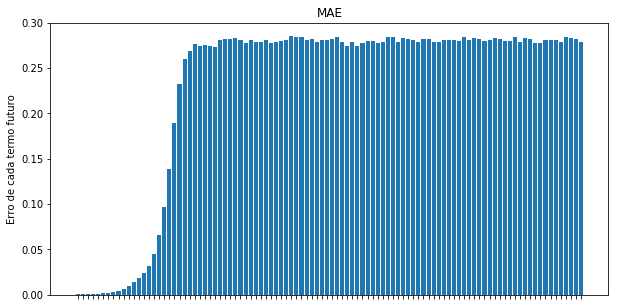

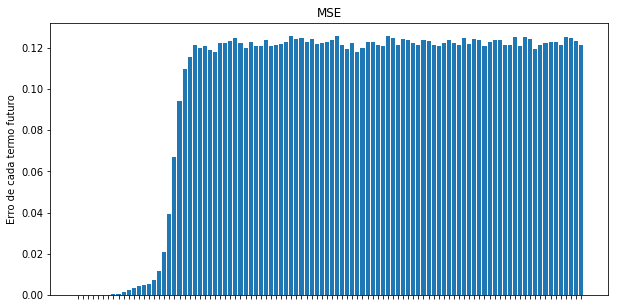

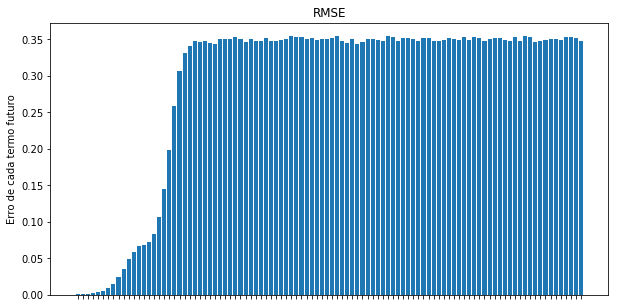

In [6]:
FUTUREerror = turnintoarray(future_error,future)
mae,mse,rmse = geterrors(FUTUREerror)

print('mae',mae,'\n mse',mse,'\n rmse',rmse,'\n')


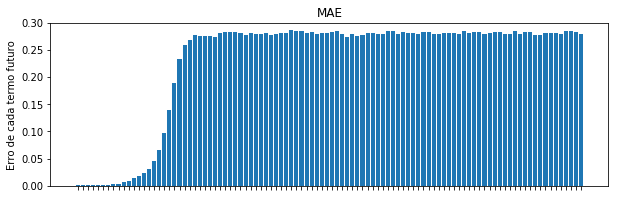

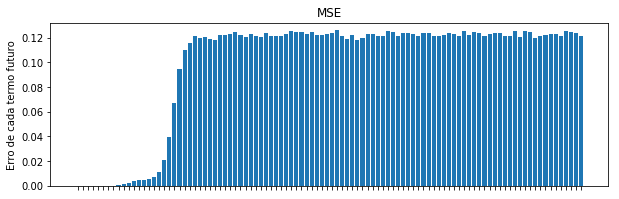

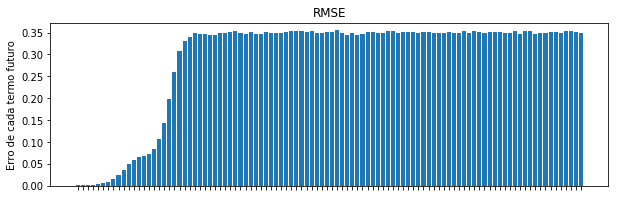

In [7]:

label = []

plt.figure(figsize=(10,3))
index = np.arange(len(mae))
plt.bar(index, mae)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('MAE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(mse))
plt.bar(index, mse)
plt.xticks(index,label, fontsize=5, rotation=30)
plt.title('MSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

plt.figure(figsize=(10,3))
index = np.arange(len(rmse))
plt.bar(index, rmse)
plt.xticks(index, label, fontsize=5, rotation=30)
plt.title('RMSE')
plt.ylabel('Erro de cada termo futuro')
plt.show()

    